In [1]:
import numpy as np
import json
import scipy.io as sio
import os
import tensorflow as tf
from PIL import Image

In [2]:
path = r'E:\Visual Wake Words\data\instances_visualwakewords_train2014.json'

In [50]:
image = Image.open(r'E:\Visual Wake Words\data\coco_dataset\train2014\COCO_train2014_000000000086.jpg')

In [61]:
image = image.resize((320,240))
np.array(image).shape

(240, 320)

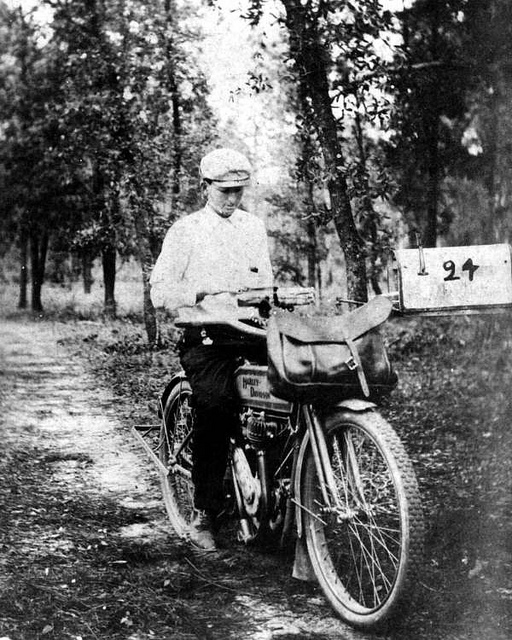

In [52]:
image.convert('')

In [62]:

a = np.array(image.convert('L'))
a/256

array([[0.76953125, 0.765625  , 0.921875  , ..., 0.22265625, 0.2109375 ,
        0.15234375],
       [0.67578125, 0.57421875, 0.51171875, ..., 0.19140625, 0.1875    ,
        0.1875    ],
       [0.60546875, 0.5234375 , 0.5390625 , ..., 0.21484375, 0.171875  ,
        0.1328125 ],
       ...,
       [0.1875    , 0.34765625, 0.33203125, ..., 0.328125  , 0.296875  ,
        0.28515625],
       [0.3203125 , 0.2734375 , 0.21875   , ..., 0.30078125, 0.328125  ,
        0.39453125],
       [0.93359375, 0.98828125, 0.99609375, ..., 0.3125    , 0.33203125,
        0.34765625]])

In [9]:
np.array(image)

array([[203, 204, 220, ...,  66,  61,  53],
       [197, 188, 196, ...,  54,  49,  39],
       [191, 169, 164, ...,  50,  48,  39],
       ...,
       [127, 139, 184, ...,  80,  86,  86],
       [239, 246, 253, ...,  85,  92,  89],
       [255, 254, 252, ..., 106, 108, 106]], dtype=uint8)

In [40]:
with open(path, 'r') as f:
    groundtruth_data = json.load(f)

In [41]:
groundtruth_data['annotations']

{'57870': {'objects': [], 'label': 0},
 '384029': {'objects': [{'area': 87957.80790000001,
    'bbox': [4.82, 2.89, 478.17, 302.71]}],
  'label': 1},
 '222016': {'objects': [{'area': 32991.66165,
    'bbox': [225.29, 185.04, 126.28, 411.84]}],
  'label': 1},
 '520950': {'objects': [], 'label': 0},
 '69675': {'objects': [{'area': 67117.45100000002,
    'bbox': [111.1, 64.72, 217.89, 409.89]},
   {'area': 71105.3788, 'bbox': [309.57, 44.22, 255.64, 429.31]}],
  'label': 1},
 '547471': {'objects': [{'area': 88377.66840000002,
    'bbox': [80.54, 25.89, 250.25, 606.92]}],
  'label': 1},
 '122688': {'objects': [], 'label': 0},
 '392136': {'objects': [{'area': 18382.3149,
    'bbox': [295.42, 109.81, 149.27, 215.7]},
   {'area': 1843.731950000002, 'bbox': [278.38, 160.55, 35.98, 104.62]},
   {'area': 6049.339899999997, 'bbox': [402.74, 166.92, 66.41, 158.34]},
   {'area': 1419.9376000000007, 'bbox': [456.96, 162.64, 21.07, 118.74]}],
  'label': 1},
 '398494': {'objects': [], 'label': 0},
 '9

In [42]:
c = 0
label_dict = {}
for key, word in groundtruth_data['annotations'].items():
#     print(key, word['label'])
    label_dict[key] = word['label']

In [43]:
keys = label_dict.keys()
keys = list(keys)
keys = [int(k) for k in keys]
keys.sort()
keys = [str(k) for k in keys]
label_dict_sorted = {}
for key in keys:
    label_dict_sorted[key] = label_dict[key]
# label_dict_sorted = [label_dict[key] for key in keys]
label_dict_sorted

{'9': 0,
 '25': 0,
 '30': 0,
 '34': 0,
 '36': 1,
 '49': 1,
 '61': 0,
 '64': 0,
 '71': 0,
 '72': 0,
 '77': 1,
 '78': 0,
 '81': 0,
 '86': 1,
 '89': 0,
 '92': 0,
 '94': 0,
 '109': 0,
 '110': 1,
 '113': 1,
 '127': 0,
 '138': 0,
 '142': 0,
 '144': 0,
 '149': 1,
 '151': 0,
 '154': 0,
 '165': 1,
 '194': 0,
 '201': 0,
 '247': 0,
 '250': 0,
 '260': 1,
 '263': 0,
 '307': 0,
 '308': 1,
 '309': 0,
 '312': 0,
 '315': 1,
 '321': 0,
 '322': 1,
 '326': 1,
 '332': 0,
 '349': 0,
 '368': 1,
 '370': 1,
 '382': 1,
 '384': 0,
 '389': 1,
 '394': 0,
 '404': 0,
 '419': 1,
 '431': 1,
 '436': 1,
 '438': 0,
 '443': 1,
 '446': 1,
 '450': 0,
 '471': 0,
 '490': 0,
 '491': 0,
 '508': 0,
 '510': 1,
 '514': 0,
 '529': 1,
 '531': 0,
 '532': 1,
 '540': 0,
 '542': 1,
 '560': 0,
 '562': 0,
 '572': 1,
 '575': 0,
 '581': 0,
 '584': 0,
 '595': 0,
 '597': 0,
 '605': 0,
 '612': 0,
 '620': 0,
 '625': 1,
 '629': 0,
 '634': 1,
 '643': 0,
 '650': 0,
 '656': 0,
 '659': 1,
 '670': 0,
 '671': 0,
 '673': 0,
 '681': 0,
 '684': 1,
 '690'

In [44]:
sio.savemat(r'E:\Visual Wake Words\data\coco_dataset\labels\train_labels.mat', label_dict_sorted)

In [2]:
label = sio.loadmat(r'E:\Visual Wake Words\data\coco_dataset\labels\val_labels.mat')

In [7]:
key = list(label.keys())[3:]

In [30]:
from PIL import Image
img = Image.open(r'E:\Visual Wake Words\data\coco_dataset\train2014\COCO_train2014_000000000086.jpg')
data = np.array(img, dtype = np.uint8)
data = data.astype(np.float32)
data = data/255
data.shape

(640, 512)

In [41]:
import matplotlib.pyplot as p
image_raw_data = tf.gfile.FastGFile(r'E:\Visual Wake Words\data\coco_dataset\train2014\COCO_train2014_000000000113.jpg','rb').read()
with tf.Session() as sess:
    img_data_tf = tf.image.decode_jpeg(image_raw_data)

    img_data_resize_tf = tf.image.resize_images(img_data_tf, [240, 320], method=1)
    img_data_resize_gray_tf = tf.image.rgb_to_grayscale(img_data_resize_tf)
    
    img_data = img_data_tf.eval()
    img_data_1 = img_data_resize_gray_tf.eval()

img_data_2.shape


(240, 320, 3)

In [3]:
with tf.Session() as sess:
    img_tf=tf.gfile.FastGFile(r'E:\Visual Wake Words\data\coco_dataset\train2014\COCO_train2014_000000000086.jpg', 'rb').read()
    img_tf = tf.image.decode_jpeg(img_tf)
    print(img_tf.shape)
    data = img_tf.eval()
data.shape

(?, ?, ?)


(640, 512, 1)

In [10]:
def train_data_generator():
    train_path = r'E:\Visual Wake Words\data\coco_dataset\train2014\\'
    file_list = os.listdir(train_path)
    file_pt = 0
    train_labels = sio.loadmat(r'E:\Visual Wake Words\data\coco_dataset\labels\train_labels.mat')
    label_keys = list(train_labels.keys())[3:] # index >=3 is valid
    image_resolution = [240,320]
    while True:
            # padding: tf.image.resize_image_with_crop_or_pad(img_data, x, y)
            # resize: tf.image.resize_images(img_data, [x, y], method=0)  
        for i in range(4):
            if file_pt == len(file_list):
                file_pt = 0
            if i == 0:
                grandtrue_label_batch = []
                grandtrue_label_batch.append(train_labels[label_keys[file_pt]])
                names = []
                names.append(label_keys[file_pt])
                
                with tf.Session() as sess:
                    img_tf=tf.gfile.FastGFile(train_path + file_list[file_pt], 'rb').read()
                    file_pt += 1
                        # decode
                    img_tf = tf.image.decode_jpeg(img_tf)
                        # method = 0 or 2 is invalid, the cause is unknown
                    img_resize_tf = tf.image.resize_images(img_tf, image_resolution, method=1)
                        # RGB2Gray
                    if img_resize_tf.eval().shape[2]==3:
                        img_resize_gray_tf = tf.image.rgb_to_grayscale(img_resize_tf)
                    else:
                        img_resize_gray_tf = img_resize_tf
                    img_data = img_resize_gray_tf.eval()
                    data_batch = img_data.reshape([1,image_resolution[0],image_resolution[1],1])
            else:
                grandtrue_label_batch.append(train_labels[label_keys[file_pt]])
                names.append(label_keys[file_pt])
                with tf.Session() as sess:
                    img_tf=tf.gfile.FastGFile(train_path + file_list[file_pt], 'rb').read()
                    file_pt += 1
                        # decode
                    img_tf = tf.image.decode_jpeg(img_tf)
                        # method = 0 or 2 is invalid, the cause is unknown
                    img_resize_tf = tf.image.resize_images(img_tf, image_resolution, method=1)
                        # RGB2Gray
                    if img_resize_tf.eval().shape[2]==3:
                        img_resize_gray_tf = tf.image.rgb_to_grayscale(img_resize_tf)
                    else:
                        img_resize_gray_tf = img_resize_tf
                    img_data = img_resize_gray_tf.eval()
                    data_batch = np.concatenate([data_batch, img_data.reshape([1,image_resolution[0],image_resolution[1],1])],axis=0)
        yield data_batch, np.array(grandtrue_label_batch).reshape([-1,]), names

In [11]:
generator = train_data_generator()

In [12]:
data, label, name = next(generator)

W1120 13:30:30.243600 98004 deprecation.py:323] From <ipython-input-10-ebf711ab6f37>:21: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.


In [13]:
data

array([[[[ 26],
         [ 25],
         [ 26],
         ...,
         [167],
         [159],
         [162]],

        [[ 25],
         [ 23],
         [ 26],
         ...,
         [169],
         [165],
         [164]],

        [[ 25],
         [ 26],
         [ 28],
         ...,
         [173],
         [169],
         [166]],

        ...,

        [[  0],
         [  5],
         [ 12],
         ...,
         [ 89],
         [137],
         [ 48]],

        [[  1],
         [  2],
         [  7],
         ...,
         [ 53],
         [ 29],
         [ 11]],

        [[  0],
         [  3],
         [  7],
         ...,
         [ 12],
         [  6],
         [  2]]],


       [[[  8],
         [  7],
         [  8],
         ...,
         [137],
         [ 86],
         [ 58]],

        [[  8],
         [  7],
         [  8],
         ...,
         [177],
         [161],
         [148]],

        [[  8],
         [  6],
         [  7],
         ...,
         [209],
         [

In [21]:
23.0/2


11.5